# Intro to Julia and Numerical Differentiations

## Forward difference

We would like to find the derivative of a function $f(x)$

$$
  f'(x) = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$
Hence,
$$
  f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$
or more formaly (using the asymptotic $O$ notation)
$$
  f'(x) + O(\Delta x) = \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$

$$
  error = \left|f'(x) - \frac{f(x+\Delta x) - f(x)}{\Delta x}\right| =  O(\Delta x)
$$

## Example of round-off error

In [1]:
Δx = 1e-90
x = 0

(exp(x + Δx) - exp(x)) / Δx

0.0

In [2]:
exp(0)

1.0

## Functions

In [5]:
function forward_diff(f::Function, x::Real, Δx::Real)
    return (f(x + Δx) - f(x)) / Δx
end

forward_diff (generic function with 2 methods)

In [8]:
forward_diff(exp, 0, 1e-6)

1.0000004999621837

## Arrays

In [11]:
A = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [12]:
A = [1. 2 3]

1×3 Matrix{Float64}:
 1.0  2.0  3.0

In [17]:
x = range(1, 3, 3)

1.0:1.0:3.0

### Evaluating elementwise functions

### Ugly method

In [25]:
results = zeros(length(x))

for k = 1:length(x)
     results[k] = exp(x[k])
end

results

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

### Bad method

In [27]:
results = [exp(z) for z = x]

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

### Good method

In [28]:
exp.(x)

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

## Plotting

In [29]:
using PyPlot

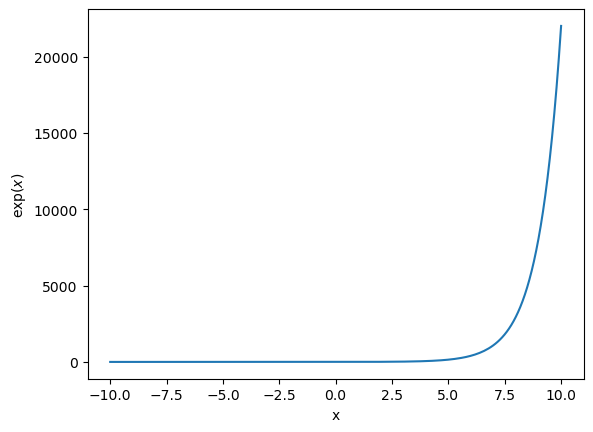

In [36]:
x  = range(-10, 10, 200)

plot(x, exp.(x))
xlabel("x")
ylabel(L"$\exp(x)$")
show()

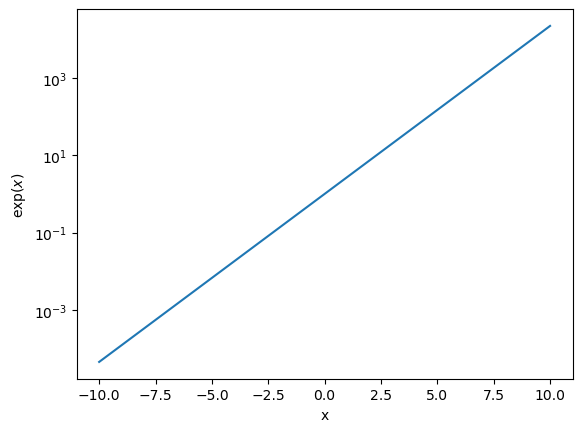

In [40]:
x  = range(-10, 10, 200)

semilogy(x, exp.(x))
xlabel("x")
ylabel(L"$\exp(x)$")
show()

## Error analysis of the forward finte difference

In [43]:
ΔX = 10 .^ range(-20, -1, 20)

20-element Vector{Float64}:
 1.0e-20
 1.0e-19
 1.0e-18
 1.0e-17
 1.0e-16
 1.0e-15
 1.0e-14
 1.0e-13
 1.0e-12
 1.0e-11
 1.0e-10
 1.0e-9
 1.0e-8
 1.0e-7
 1.0e-6
 1.0e-5
 0.0001
 0.001
 0.010000000000000002
 0.1

In [55]:
exp(0) .- forward_diff.(exp, 0, ΔX)

20-element Vector{Float64}:
  1.0
  1.0
  1.0
  1.0
  1.0
 -0.11022302462515654
  0.0007992778373591136
  0.0007992778373591136
 -8.890058234101161e-5
 -8.274037099909037e-8
 -8.274037099909037e-8
 -8.274037099909037e-8
  6.07747097092215e-9
 -4.943368026033568e-8
 -4.999621836532242e-7
 -5.000006964905879e-6
 -5.0001667140975314e-5
 -0.0005001667083845973
 -0.005016708416794691
 -0.051709180756477124